In [11]:
RunningInCOLAB = 'google.colab' in str(get_ipython())

if RunningInCOLAB:
    !pip install torch, matplotlib, numpy, tqdm

#### Notice of Ownership
Based on Pete Canfield's Example designed in CS 8001 Nonlinear Systems

In [12]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from typing import Union

## General Idea

Linear Regression is attempting to fit a linear equation to data as a line of best fit. This means we need both a training dataset as well as a testing dataset. For our use purposes, we have defined a simple ground truth function to prove our accuracy and derive the data from.

In [13]:
def ground_truth_function(x: Union[np.ndarray, float]) -> Union[np.ndarray, float]:
    return 2*x+3 # A test function, you can change this to whatever you want.
    
def generate_data(start, stop, resolution, std=0.5):
    x_values = np.linspace(start, stop, resolution)
    signal = ground_truth_function(x_values)   
    return x_values, signal, signal + np.random.normal(0, std, signal.shape)

Now lets plot the training data.

In [14]:
def plot_data(x_values,regression,training_data):
    plt.plot(x_values, regression, label='function')
    plt.scatter(x_values, training_data, label='training data')
    plt.legend()
    plt.show()


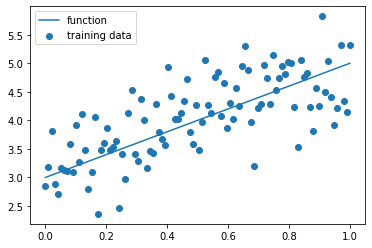

In [15]:
#Generate some data to use for the rest of the notebook.
data = generate_data(0,1,100)

#Plot it.
plot_data(data[0],data[1],data[2])

## Perceptron
The key to understand here is that a single perceptron is able to represent a linear regression problem. Therefore we can take advantage of Pytorch's Linear layer model to make a linear regression example. Another way to do this is simply through the sklearn toolkit.

In [16]:
#Now implement a Perceptron
import torch.nn as nn 
class Perceptron(nn.Module):
    def __init__(self):
        super().__init__()
        self.node = nn.Linear(1,1)
    
    def forward(self, x):
        return self.node(x)

#Define the criteria function.
def criterion(out,label):
    return (label - out)**2

In [17]:
#Now lets train the network.
import torch.optim as optim
from tqdm import tqdm
perceptron = Perceptron()

optimizer = optim.Adam(perceptron.parameters(), lr=1e-1)

inputs, ground_truth, training = data

#Now run the training loop.
for epoch in tqdm(range(1000), desc='Training network'):
    #Do one update for each sample.
    for x,y in zip(inputs, training):

        x = torch.tensor([x]).float() 
        y = torch.tensor([y]).float()

        optimizer.zero_grad()
        network_output = perceptron(x)
        loss = criterion(network_output, y)
        
        
        loss.backward()
        optimizer.step()



Training network: 100%|██████████| 1000/1000 [00:23<00:00, 43.02it/s]


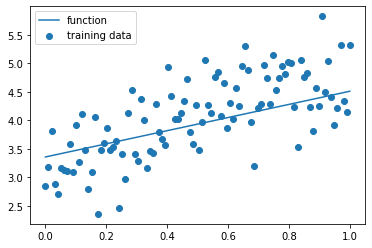

In [18]:
#Now lets plot the found function.
found_values = np.array([perceptron(torch.Tensor([inp]).float()).detach().numpy() for inp in inputs])
plot_data(inputs, found_values, training)